<a href="https://colab.research.google.com/github/mobassir94/Practicing-Tensorflow/blob/master/kaggle_pneumonia(overfitted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications import vgg16
from keras.models import Model
import keras
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras import optimizers
from google.colab import files

from glob import glob
import os
import numpy as np
#import pandas as pd
import tensorflow as tf
#from skimage.io import imread

#import matplotlib.pyplot as plt


from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array


input_shape = (150, 150, 3)
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
print(output)
output = keras.layers.Flatten()(output)
print(output)
vgg_model = Model(vgg.input, output)
vgg_model.output


Instructions for updating:
Colocations handled automatically by placer.
Tensor("block5_pool/MaxPool:0", shape=(?, 4, 4, 512), dtype=float32)
Tensor("flatten_1/Reshape:0", shape=(?, ?), dtype=float32)


<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>

In [0]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [0]:
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
!pip install -U -q kaggle
!mkdir  /root/.kaggle

files.upload()
!cp kaggle.json /root/.kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumoniapd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `kaggle datasets download -d paultimothymooney/chest-xray-pneumoniapd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) '


In [0]:

!pip install -U -q kaggle
!mkdir  /root/.kaggle

files.upload()
!cp kaggle.json /root/.kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia





mkdir: cannot create directory ‘/root/.kaggle’: File exists


chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:

!apt install pv
!unzip -o /content/chest-xray-pneumonia.zip  | pv -l >/dev/null
os.remove('chest-xray-pneumonia.zip')
!unzip -o /content/chest_xray.zip  | pv -l >/dev/null
os.remove('chest_xray.zip')




Reading package lists... Done
Building dependency tree       
Reading state information... Done
pv is already the newest version (1.6.6-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
2.00  0:00:15 [ 128m/s] [  <=>                                                 ]
11.7k 0:00:16 [ 694 /s] [                 <=>                                  ]


In [0]:

IMG_DIM = (150, 150)
#data_dir  = '/content/chest_xray/'
train_files = glob('/content/chest_xray/train/**/**/*.jpeg', recursive=True)
#train_files = data_dir+'train/'

train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)


In [0]:
import cv2
import fnmatch
pattern_normal = '*NORMAL*'
pattern_bacteria = '*_bacteria_*'
pattern_virus = '*_virus_*'
train_labels = []
normal = fnmatch.filter(train_files, pattern_normal)
bacteria = fnmatch.filter(train_files, pattern_bacteria)
virus = fnmatch.filter(train_files, pattern_virus)

for img in train_files:
    full_size_image = cv2.imread(img)
    im = cv2.resize(full_size_image, (224, 224), interpolation=cv2.INTER_CUBIC)
    #x.append(im)
    if img in normal:
        train_labels.append(0)
    elif img in bacteria:
        train_labels.append(1)
    elif img in virus:
        train_labels.append(1)
    else:
        #break
        print('no class')

train_labels[5000]

0

In [0]:



validation_files = glob('/content/chest_xray/test/**/**/*.jpeg', recursive=True)
validation_imgs  = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs  = np.array(validation_imgs)

normal = fnmatch.filter(validation_files, pattern_normal)
bacteria = fnmatch.filter(validation_files, pattern_bacteria)
virus = fnmatch.filter(validation_files, pattern_virus)
validation_labels = []


for img in validation_files:
    full_size_image = cv2.imread(img)
    im = cv2.resize(full_size_image, (224, 224), interpolation=cv2.INTER_CUBIC)
    #x.append(im)
    if img in normal:
        validation_labels.append(0)
    elif img in bacteria:
        validation_labels.append(1)
    elif img in virus:
        validation_labels.append(1)
    else:
        #break
        print('no class')


validation_labels[10]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

(150, 150, 3)


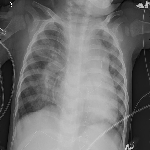

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img



train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])


(1, 4, 4, 512)


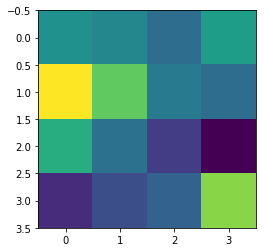

In [0]:

bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [0]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)



Train Bottleneck Features: (10432, 8192) 	Validation Bottleneck Features: (1248, 8192)


In [0]:

history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=16,
                    epochs=99,
             
                    verbose=2)




Train on 10432 samples, validate on 1248 samples
Epoch 1/99
 - 5s - loss: 0.0254 - acc: 0.9924 - val_loss: 2.3074 - val_acc: 0.7500
Epoch 2/99
 - 5s - loss: 0.0215 - acc: 0.9932 - val_loss: 2.6686 - val_acc: 0.7324
Epoch 3/99
 - 5s - loss: 0.0201 - acc: 0.9938 - val_loss: 3.0864 - val_acc: 0.7260
Epoch 4/99
 - 5s - loss: 0.0173 - acc: 0.9945 - val_loss: 1.9863 - val_acc: 0.8061
Epoch 5/99
 - 5s - loss: 0.0126 - acc: 0.9954 - val_loss: 2.8996 - val_acc: 0.7372
Epoch 6/99
 - 5s - loss: 0.0153 - acc: 0.9965 - val_loss: 2.1459 - val_acc: 0.8013
Epoch 7/99
 - 5s - loss: 0.0133 - acc: 0.9960 - val_loss: 2.8773 - val_acc: 0.7436
Epoch 8/99
 - 5s - loss: 0.0116 - acc: 0.9965 - val_loss: 2.6521 - val_acc: 0.7676
Epoch 9/99
 - 5s - loss: 0.0147 - acc: 0.9958 - val_loss: 2.6671 - val_acc: 0.7644
Epoch 10/99
 - 5s - loss: 0.0103 - acc: 0.9972 - val_loss: 2.2405 - val_acc: 0.8045
Epoch 11/99
 - 5s - loss: 0.0087 - acc: 0.9975 - val_loss: 2.6369 - val_acc: 0.7788
Epoch 12/99
 - 5s - loss: 0.0141 - a

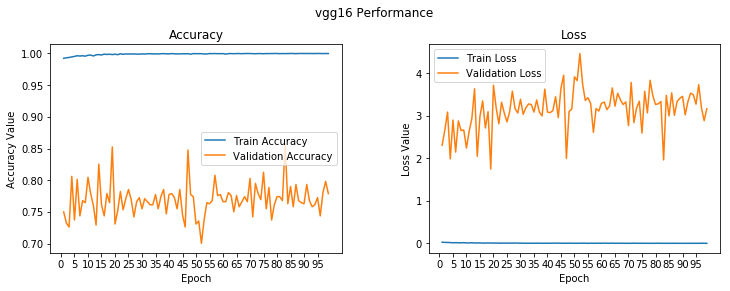

In [0]:


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('vgg16 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,100))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 100, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 100, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
# Evaluate the model
scores = model.evaluate_generator(test_generator,steps=16)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate_generator(test_generator,steps=16) #624 testing images
print("Test Accuracy = ", scores[1])

scores = model.evaluate_generator(validation_generator,steps=16) #16 validation images
print("validation Accuracy = ", scores[1])

#scores = model.predict_generator(test_generator) #624 testing images
#print("first prediction = ", scores[0])



NameError: ignored

In [0]:
Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
print('Confusion Matrix')
#print(test_generator.classes)
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['NORMAL', 'PNEUMONIA']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))